In [8]:
# Import the dependencies
import random
import numpy as np
import pandas as pd
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 2000)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longtitudes to a list
coordinates = list(lat_lngs)

# Create a list to hold the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

776

In [11]:
# Starting URL for Weather API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [20]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_description = city_weather["weather"][0]["description"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 16 | puerto ayora
Processing Record 2 of Set 16 | rikitea
Processing Record 3 of Set 16 | la rioja
Processing Record 4 of Set 16 | torbay
Processing Record 5 of Set 16 | vyazemskiy
Processing Record 6 of Set 16 | mamit
Processing Record 7 of Set 16 | kruisfontein
Processing Record 8 of Set 16 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 16 | nauta
Processing Record 10 of Set 16 | punta arenas
Processing Record 11 of Set 16 | maracas
Processing Record 12 of Set 16 | grindavik
Processing Record 13 of Set 16 | kodiak
Processing Record 14 of Set 16 | bronnitsy
Processing Record 15 of Set 16 | cape town
Processing Record 16 of Set 16 | vaini
Processing Record 17 of Set 16 | haines junction
Processing Record 18 of Set 16 | yendi
Processing Record 19 of Set 16 | mehamn
Processing Record 20 of Set 16 | ciudad valles
Processing Record 21 of Set 16 | saskylakh
Processing Record 22 of Se

Processing Record 35 of Set 19 | svetlogorsk
Processing Record 36 of Set 19 | cockburn town
Processing Record 37 of Set 19 | airai
Processing Record 38 of Set 19 | thompson
Processing Record 39 of Set 19 | nhulunbuy
Processing Record 40 of Set 19 | nyurba
Processing Record 41 of Set 19 | severo-kurilsk
Processing Record 42 of Set 19 | chumikan
Processing Record 43 of Set 19 | karakol
Processing Record 44 of Set 19 | pangnirtung
Processing Record 45 of Set 19 | addi ugri
City not found. Skipping...
Processing Record 46 of Set 19 | doctor pedro p. pena
City not found. Skipping...
Processing Record 47 of Set 19 | zhezkazgan
Processing Record 48 of Set 19 | tiznit
Processing Record 49 of Set 19 | gornyy
Processing Record 50 of Set 19 | ahipara
Processing Record 1 of Set 20 | bellevue
Processing Record 2 of Set 20 | warrington
Processing Record 3 of Set 20 | majene
Processing Record 4 of Set 20 | roald
Processing Record 5 of Set 20 | ilulissat
Processing Record 6 of Set 20 | port macquarie


Processing Record 16 of Set 23 | baia
Processing Record 17 of Set 23 | ventosa
Processing Record 18 of Set 23 | tsumeb
Processing Record 19 of Set 23 | oktyabrskoye
Processing Record 20 of Set 23 | dali
Processing Record 21 of Set 23 | xingyi
Processing Record 22 of Set 23 | kavieng
Processing Record 23 of Set 23 | meulaboh
Processing Record 24 of Set 23 | am timan
Processing Record 25 of Set 23 | richards bay
Processing Record 26 of Set 23 | isangel
Processing Record 27 of Set 23 | umea
Processing Record 28 of Set 23 | ondorhaan
City not found. Skipping...
Processing Record 29 of Set 23 | suntar
Processing Record 30 of Set 23 | shiloh
Processing Record 31 of Set 23 | bengkulu
Processing Record 32 of Set 23 | esperance
Processing Record 33 of Set 23 | babanka
Processing Record 34 of Set 23 | orapa
Processing Record 35 of Set 23 | cooma
Processing Record 36 of Set 23 | san cristobal
Processing Record 37 of Set 23 | kushmurun
Processing Record 38 of Set 23 | camabatela
Processing Record 

Processing Record 48 of Set 26 | akyab
Processing Record 49 of Set 26 | tomatlan
Processing Record 50 of Set 26 | vanavara
Processing Record 1 of Set 27 | fredericksburg
Processing Record 2 of Set 27 | zhigansk
Processing Record 3 of Set 27 | muisne
Processing Record 4 of Set 27 | buariki
City not found. Skipping...
Processing Record 5 of Set 27 | zharkovskiy
Processing Record 6 of Set 27 | sechura
Processing Record 7 of Set 27 | asfi
Processing Record 8 of Set 27 | agadez
Processing Record 9 of Set 27 | kisangani
Processing Record 10 of Set 27 | lerwick
Processing Record 11 of Set 27 | assiniboia
Processing Record 12 of Set 27 | taltal
Processing Record 13 of Set 27 | gutierrez
Processing Record 14 of Set 27 | turtas
Processing Record 15 of Set 27 | urucara
Processing Record 16 of Set 27 | bose
Processing Record 17 of Set 27 | huarmey
Processing Record 18 of Set 27 | yamada
Processing Record 19 of Set 27 | yuzhno-kurilsk
Processing Record 20 of Set 27 | oelde
Processing Record 21 of S

Processing Record 32 of Set 30 | sidney
Processing Record 33 of Set 30 | kenai
Processing Record 34 of Set 30 | teguldet
Processing Record 35 of Set 30 | mao
Processing Record 36 of Set 30 | teplodar
Processing Record 37 of Set 30 | makakilo city
Processing Record 38 of Set 30 | labuan
Processing Record 39 of Set 30 | tazovskiy
Processing Record 40 of Set 30 | najran
Processing Record 41 of Set 30 | chapais
Processing Record 42 of Set 30 | flinders
Processing Record 43 of Set 30 | zaria
Processing Record 44 of Set 30 | shaunavon
Processing Record 45 of Set 30 | banjar
Processing Record 46 of Set 30 | bayan
Processing Record 47 of Set 30 | vardo
Processing Record 48 of Set 30 | huntersville
Processing Record 49 of Set 30 | paso de patria
Processing Record 50 of Set 30 | punta cardon
Processing Record 1 of Set 31 | beroroha
Processing Record 2 of Set 31 | maracaibo
Processing Record 3 of Set 31 | monrovia
Processing Record 4 of Set 31 | lisala
Processing Record 5 of Set 31 | tirlyanskiy


In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(50)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Puerto Ayora,EC,-0.7393,-90.3518,81.55,83,33,4.00,2022-03-17 23:42:18
1,Rikitea,PF,-23.1203,-134.9692,80.58,79,14,14.83,2022-03-17 23:37:57
2,La Rioja,ES,42.2500,-2.5000,40.78,99,100,4.85,2022-03-17 23:42:18
3,Torbay,CA,47.6666,-52.7314,33.28,76,75,10.36,2022-03-17 23:42:18
4,Vyazemskiy,RU,47.5378,134.7525,15.46,80,9,8.41,2022-03-17 23:42:19
5,Mamit,IN,23.9333,92.4833,59.38,50,46,2.91,2022-03-17 23:42:19
6,Kruisfontein,ZA,-34.0033,24.7314,60.89,84,25,5.66,2022-03-17 23:42:19
7,Nauta,PE,-4.5061,-73.5757,73.80,98,73,2.57,2022-03-17 23:42:20
8,Punta Arenas,CL,-53.1500,-70.9167,41.11,60,20,17.27,2022-03-17 23:37:40
9,Maracas,BR,-13.4411,-40.4308,65.07,89,36,8.75,2022-03-17 23:42:20


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_data into a csv.
city_data_df.to_csv(output_data_file, index_label = "City ID")


In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

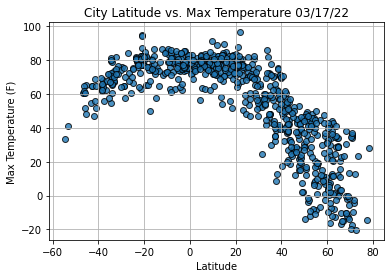

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

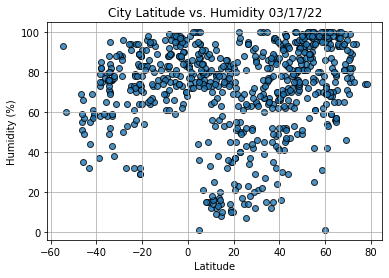

In [30]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")
plt.show()

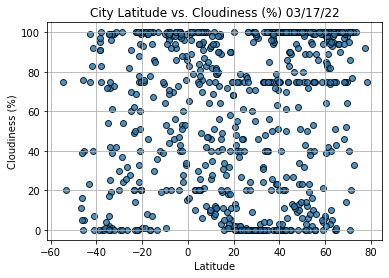

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show play
plt.show()

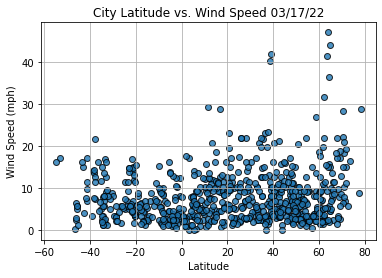

In [35]:
# Build the scatter plots for the latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()